**1- Import Libraries**

In [1]:
# Import Pandas and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Import LinearRegression, LassoCV, Ridge
# Import SVR, DecisionTreeRegressor, RandomForestRegressor, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LassoCV, Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Import regression Report function
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

**2- Read the Data**

In [2]:
#read the Data in csv format
data = pd.read_csv('insurance.csv')

**3-  Exploratory Data Analysis**


In [36]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Note There are no Null values**



*   Examine the distribution of Bmi (Body Mass Index)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of BMI')

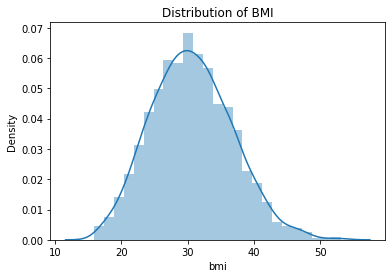

In [43]:
sns.distplot(data['bmi'])
plt.title('Distribution of BMI')



*   Examine the relationship between “smoker” and “charges”



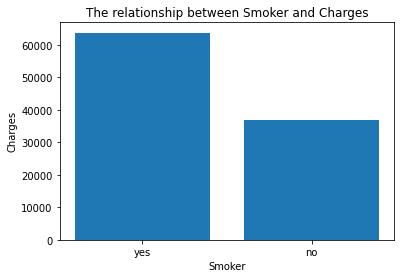

In [45]:
plt.bar(data['smoker'], data['charges'])
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('The relationship between Smoker and Charges')
plt.show()

**Note that the smoker charges more than the none smoker**



*   Examine the relationship between “smoker” and “region”.



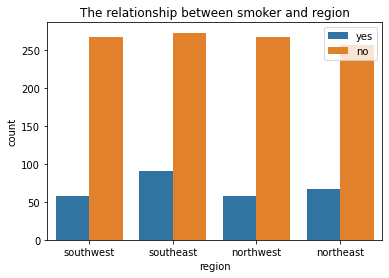

In [41]:
p = sns.countplot(data=data, x='region', hue='smoker')
plt.title('The relationship between smoker and region')
plt.legend()
plt.show()

**The smokers concentrated in the southeast region, on the other hand the other regions they are the same.**



*   Examine the relationship between “bmi” and “sex”.



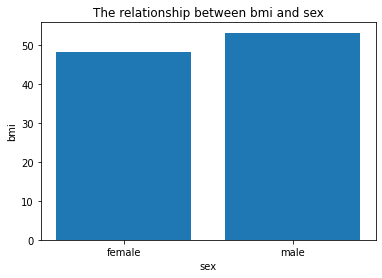

In [47]:
plt.bar(data['sex'], data['bmi'])
plt.xlabel('sex')
plt.ylabel('bmi')
plt.title('The relationship between BMI and Sex')
plt.show()

**The males have more BMI than females**



*   Find the "region" with the most "children"?



[Text(0.5, 1.0, 'The relationship between Region and Children')]

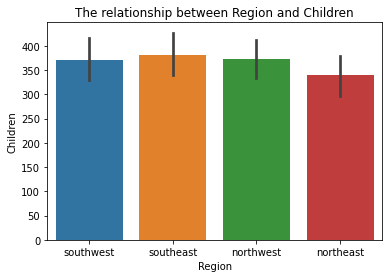

In [5]:
ax = sns.barplot(x='region', y='children', data=data, estimator=sum)
ax.set(xlabel = 'Region', ylabel = 'Children')
ax.set(title = 'The relationship between Region and Children')

**The region with the most children is Southeast.**



*   Examine the relationship between “age” and “bmi”



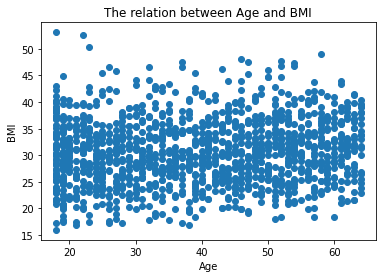

In [51]:
plt.scatter(data['age'], data['bmi'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('The relation between Age and BMI')
plt.show()



*   Examine the relationship between “bmi” and “children”



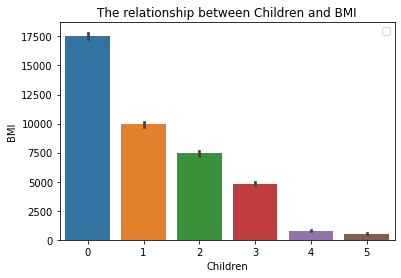

In [57]:
ax = sns.barplot(x='children', y='bmi', data=data, estimator=sum)
ax.set(xlabel = 'Children', ylabel = 'BMI')
ax.set(title = 'The relationship between Children and BMI')



*   Is there an outlier in the "bmi" variable? Please review



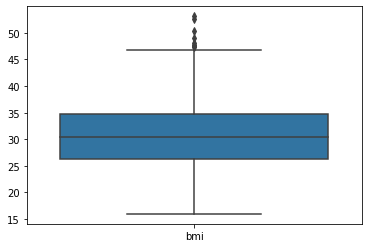

In [54]:
Z= data.loc[:,['bmi']]
ax = sns.boxplot(data=Z)

**Yes, there is Outliers.**



*   Examine the relationship between “bmi” and “charges”.



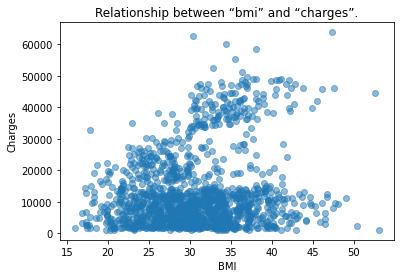

In [55]:
plt.scatter(x=data['bmi'], y=data['charges'], alpha=0.5)
plt.title('Relationship between “bmi” and “charges”.')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()



*   Examine the relationship between “region”, “smoker” and “bmi” using bar plot



[Text(0.5, 1.0, 'The relation between region, smoker and BMI')]

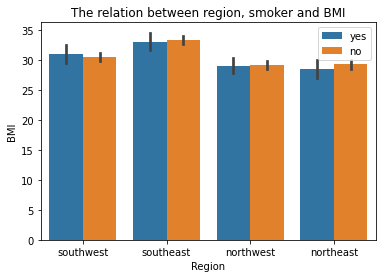

In [56]:
p = sns.barplot(x= 'region', y = 'bmi',hue='smoker', data=data)
p.set(xlabel = 'Region', ylabel = 'BMI')
p.legend()
p.set(title= 'The relation between region, smoker and BMI')


**4- Data Preprocessing**



*   Remove duplicate values



In [23]:
# check duplicated values
data[data.duplicated(keep=False)]

# drop duplicated values
data.drop_duplicates(inplace=True)



*   Transform Categorical data using One Hot Encoder



In [24]:
data = pd.get_dummies(data, columns =['sex', 'smoker', 'region'], drop_first=True)



*   Features



In [25]:
X = data.drop(['charges'], axis=1)
y = data['charges']



*   Normalize the data



Skewness: 1.5153909108403483
Kurtosis: 1.6042206849514362


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


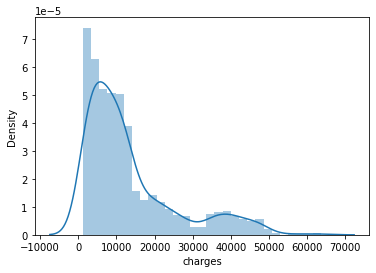

In [26]:
#Calculate Skewness and Kurtosis
print(f"Skewness: {y.skew()}")
print(f"Kurtosis: {y.kurt()}")
plot = sns.distplot(y)

Skewness after taking Log: -0.08983863481292871
Kurtosis after taking Log: -0.6345786370879938


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


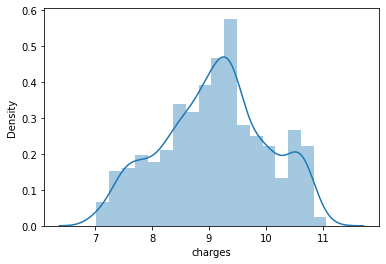

In [27]:
#reduce the Skewness by taking the log
y = np.log(y)

print(f"Skewness after taking Log: {y.skew()}")
print(f"Kurtosis after taking Log: {y.kurt()}") 
plot = sns.distplot(y)



*   Split dataset into X_train,X_test, y_train, y_test.



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

**5- Model Selection**



1.   Linear Regression.
2.   LassoCV.
3.   Ridge Model Regressor.
4.   Support Vector Regressor.
5.   MLP Regressor.
6.   Decision Tree Regressor.
7.   Random Forest Regressor.
8.   KNeighbors Regressor.



In [8]:
linear_regression_model = LinearRegression()
LassoCV_model = LassoCV()
ridge_model = Ridge()
svr_model = SVR()
mlp_model = MLPRegressor()
decision_tree__model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
KNeighbors_model = KNeighborsRegressor()

In [9]:
#cross validation for all models
linear_regression_model_scores = cross_val_score(linear_regression_model, X_train, y_train, scoring='r2', cv=5)
print('linear_regression_model_scores are:', linear_regression_model_scores)
print('**************************************')

LassoCV_model_scores = cross_val_score(LassoCV_model, X_train, y_train, scoring='r2', cv=5)
print('LassoCV_model_scores are:', LassoCV_model_scores)
print('**************************************')

ridge_model_scores = cross_val_score(ridge_model, X_train, y_train, scoring='r2', cv=5)
print('ridge_model_scores are:', ridge_model_scores)
print('**************************************')

svr_model_scores = cross_val_score(svr_model, X_train, y_train, scoring='r2', cv=5)
print('svr_model_scores are:', svr_model_scores)
print('**************************************')

mlp_model_scores = cross_val_score(mlp_model, X_train, y_train, scoring='r2', cv=5)
print('mlp_model_scores are:', mlp_model_scores)
print('**************************************')

decision_tree__model_scores = cross_val_score(decision_tree__model, X_train, y_train, scoring='r2', cv=5)
print('decision_tree__model_scores are:', decision_tree__model_scores)
print('**************************************')

random_forest_model_scores = cross_val_score(random_forest_model, X_train, y_train, scoring='r2', cv=5)
print('random_forest_model_scores are:', random_forest_model_scores)
print('**************************************')

KNeighbors_model_scores = cross_val_score(KNeighbors_model, X_train, y_train, scoring='r2', cv=5)
print('KNeighbors_model_scores are:', KNeighbors_model_scores)

linear_regression_model_scores are: [0.79095225 0.7669189  0.6965751  0.77534593 0.75936868]
**************************************
LassoCV_model_scores are: [0.78461838 0.76767734 0.69457209 0.77232079 0.75783919]
**************************************
ridge_model_scores are: [0.79031528 0.76751992 0.69679129 0.77539183 0.75871762]
**************************************
svr_model_scores are: [0.2697662  0.4412816  0.05533051 0.31984193 0.01262095]
**************************************


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

mlp_model_scores are: [0.76942133 0.56108279 0.50237898 0.63712911 0.61105156]
**************************************
decision_tree__model_scores are: [0.48288807 0.50567538 0.53987048 0.56499277 0.74900537]
**************************************
random_forest_model_scores are: [0.7582935  0.79316021 0.70703378 0.83487472 0.7856451 ]
**************************************
KNeighbors_model_scores are: [0.20303851 0.471414   0.12196433 0.26514466 0.12769615]


**I choose Random Forest Regressor because it has good score.**

In [10]:
# create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 7))}]

# Train the model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
rfe = RFE(random_forest_model)             

# call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6]}],
             return_train_score=True, scoring='r2', verbose=1)



*   Make Prediction for the selected model



In [11]:
y_pred_random_forest_model = random_forest_model.predict(X_test)

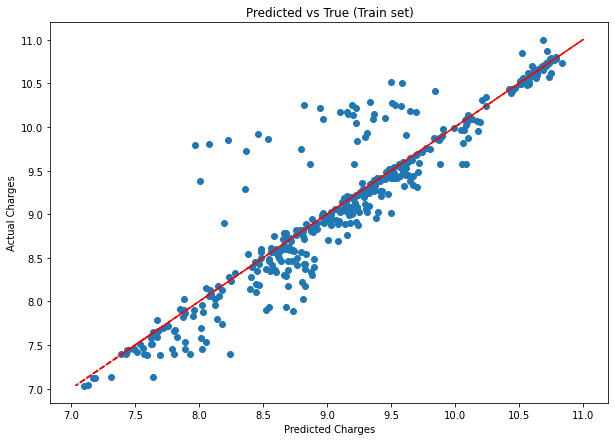

In [12]:
plt.figure(figsize=(10,7))
plt.plot(y_test, y_test, ls='--',color='red')
plt.scatter(x= y_pred_random_forest_model, y= y_test)
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.title('Predicted vs True (Train set)')
plt.show()



*   Evaluate model using Root Mean Square Error(RMSE) and R Square



In [13]:
rmse_random_forest_model = np.sqrt(mean_squared_error(y_test, y_pred_random_forest_model))
print('Random forest model rmse is', rmse_random_forest_model)

print('************************************************************')

score_random_forest_model = r2_score(y_pred_random_forest_model, y_test)
print('Random forest model score is ', score_random_forest_model)

Random forest model rmse is 0.36585944592482295
************************************************************
Random forest model score is  0.8202169802345505
